In [16]:
import torch
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import time
from daphne import daphne
from bbvi import BBVI

In [3]:
def load_graph(num):
    return daphne(['graph', '-i', '../a4/programs/{}.daphne'.format(num)])

def plot_elbos(elbos, path):
    plt.figure(figsize=(15,10))
    plt.plot(elbos)
    plt.grid(axis='y')
    plt.xlabel("Step")
    plt.ylabel("ELBO")
    plt.savefig(path)    

# Program 1

In [4]:
bbvi = BBVI(load_graph(1), lr=5e-2)
T = 1000
L = 500

start = time.time()
samples, log_weights, elbos = bbvi.sample(T, L)
end = time.time()

samples = np.array(samples)
weights = np.exp(np.array(log_weights))
elbos = np.array(elbos)
mean = np.average(samples, weights=weights)

print("Number of samples: {}".format(T*L))
print("Sampling time: {} seconds".format(int(end-start)))
print("Posterior mean of mu: {:.3f}".format(mean))
print("Variational distribution: ", list(bbvi.Q.values())[0])

100%|██████████| 1000/1000 [02:24<00:00,  6.93it/s, ELBO=tensor(-8.2394)]


Number of samples: 500000
Sampling time: 144 seconds
Posterior mean of mu: 7.241
Variational distribution:  Normal(loc: 7.249997615814209, scale: 0.9128709435462952)


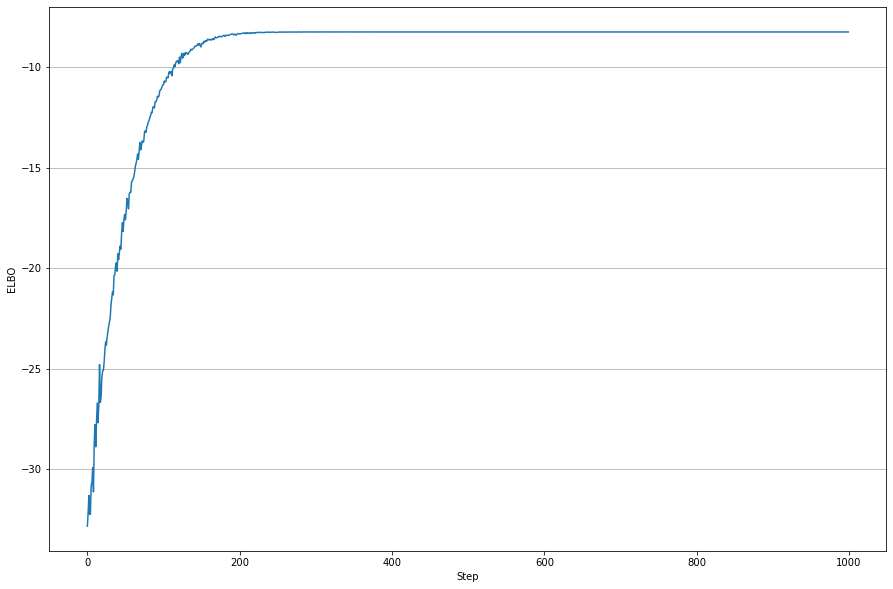

In [5]:
plot_elbos(elbos, "figs/p1_elbos.png")

Probability density plot of the variational distribution:

<img src="figs/p1_pdf.png" width=700 />

# Program 2

In [11]:
bbvi = BBVI(load_graph(2), lr=5e-2)
T = 2000
L = 500

start = time.time()
samples, log_weights, elbos = bbvi.sample(T, L)
end = time.time()

samples = np.array([sample.numpy() for sample in samples])
weights = np.exp(np.array(log_weights))
slope_mean = np.average(samples[:, 0], weights=weights)
bias_mean = np.average(samples[:, 1], weights=weights)

print("Number of samples: {}".format(T*L))
print("Sampling time: {} seconds".format(int(end-start)))
print("Posterior mean of slope: {:.3f}".format(slope_mean))
print("Posterior mean of bias: {:.3f}".format(bias_mean))

100%|██████████| 2000/2000 [10:55<00:00,  3.05it/s, ELBO=tensor(-13.9572)]


Number of samples: 1000000
Sampling time: 658 seconds
Posterior mean of slope: 2.145
Posterior mean of bias: -0.491


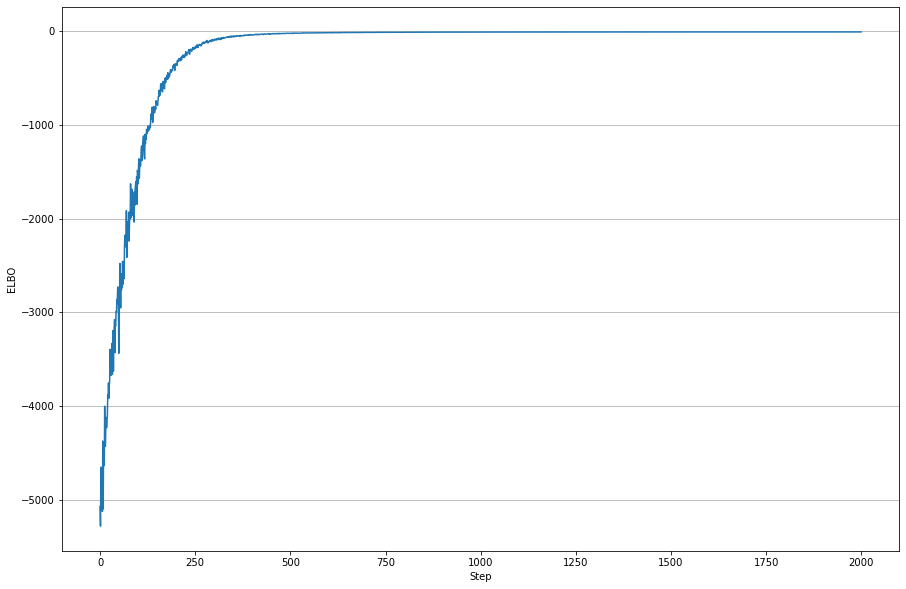

In [12]:
plot_elbos(elbos, "figs/p2_elbos.png")

# Program 3

In [16]:
bbvi = BBVI(load_graph(3), lr=3e-1)
T = 2000
L = 500

start = time.time()
samples, log_weights, elbos = bbvi.sample(T, L)
end = time.time()

samples = np.array(samples, dtype=float)
weights = np.exp(np.array(log_weights))

print("Number of samples: {}".format(T*L))
print("Sampling time: {} seconds".format(int(end-start)))
print("P(z[1] == z[2] | data) = {:.3f}".format(np.average(samples, weights=weights)))

100%|██████████| 2000/2000 [39:44<00:00,  1.19s/it, ELBO=tensor(-70.5816)]


Number of samples: 1000000
Sampling time: 2395 seconds
P(z[1] == z[2] | data) = 0.860


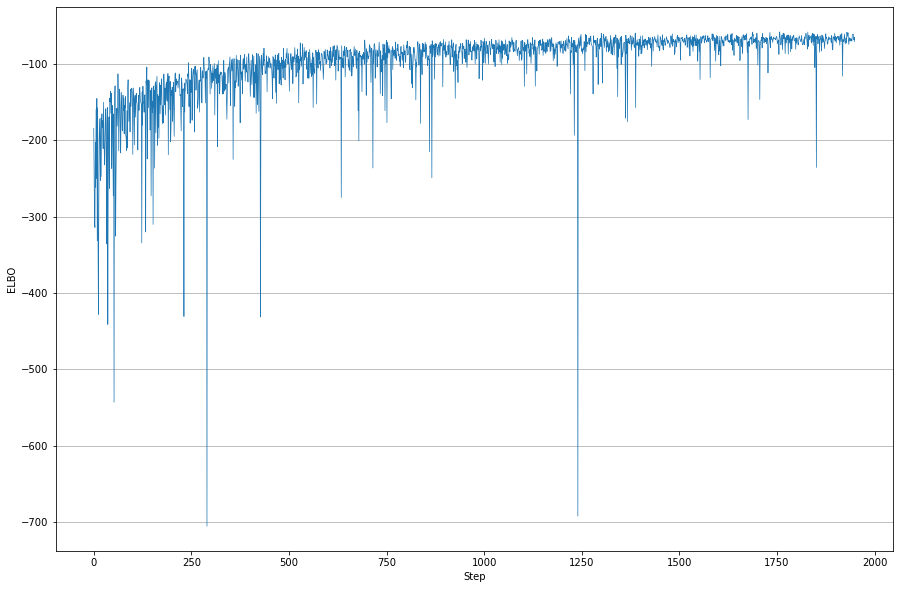

In [36]:
plt.figure(figsize=(15,10))
plt.plot(np.array(elbos[50:]), linewidth=0.7)
plt.grid(axis='y')
plt.xlabel("Step")
plt.ylabel("ELBO")
plt.savefig("figs/p3_elbos.png")

# Program 4

In [5]:
bbvi = BBVI(load_graph(4), lr=3e-2)
T = 600
L = 200

start = time.time()
rets, log_weights, elbos = bbvi.sample(T, L)
end = time.time()

100%|██████████| 600/600 [59:19<00:00,  5.93s/it, ELBO=tensor(-453.4263)]


In [6]:
samples = {'W0': [], 'b0': [], 'W1': [], 'b1': []}
for i in range(T*L):
    samples['W0'].append(rets[i][0].numpy().reshape(10))
    samples['b0'].append(rets[i][1].numpy().reshape(10))
    samples['W1'].append(rets[i][2].numpy())
    samples['b1'].append(rets[i][3].numpy().reshape(10))
samples['W0'] = np.asarray(samples['W0'])
samples['b0'] = np.asarray(samples['b0'])
samples['W1'] = np.asarray(samples['W1'])
samples['b1'] = np.asarray(samples['b1'])

np.set_printoptions(threshold=np.inf, formatter={'float_kind': "{:.3f}".format})
print("Mean of W0:\n", np.mean(samples['W0'], axis=0, keepdims=False))
print("Mean of b0:\n", np.mean(samples['b0'], axis=0, keepdims=False))
print("Mean of W1:\n", np.mean(samples['W1'], axis=0, keepdims=False))
print("Mean of b1:\n", np.mean(samples['b1'], axis=0, keepdims=False))

Mean of W0:
 [0.217 0.485 -0.226 -0.076 -0.222 0.073 -0.010 -0.396 0.170 -0.179]
Mean of b0:
 [-0.001 0.079 -0.038 -0.027 0.012 -0.064 -0.028 -0.137 -0.039 -0.039]
Mean of W1:
 [[-0.050 -0.040 -0.061 0.036 -0.059 0.106 -0.036 0.072 -0.011 0.111]
 [-0.048 -0.085 0.042 -0.025 -0.015 -0.024 -0.001 0.089 0.118 -0.027]
 [-0.051 -0.099 0.001 -0.022 0.038 0.011 0.046 0.169 0.037 0.014]
 [-0.026 0.034 -0.017 0.048 0.082 0.090 -0.054 0.024 -0.005 0.080]
 [0.010 0.182 -0.148 -0.068 -0.133 0.050 -0.031 -0.254 0.056 -0.060]
 [-0.072 -0.365 0.091 0.088 0.066 -0.075 0.039 0.094 -0.080 0.127]
 [0.035 0.207 -0.143 -0.111 -0.199 0.024 -0.071 -0.236 0.102 -0.046]
 [0.160 0.180 -0.114 0.030 -0.046 -0.055 0.023 -0.137 0.096 0.030]
 [0.120 0.265 -0.146 -0.009 -0.084 0.096 0.055 -0.224 -0.013 -0.096]
 [0.059 0.087 -0.017 0.096 -0.038 0.052 -0.002 -0.053 -0.003 -0.014]]
Mean of b1:
 [0.045 -0.076 -0.219 0.028 0.444 -0.523 0.432 0.453 0.502 0.171]


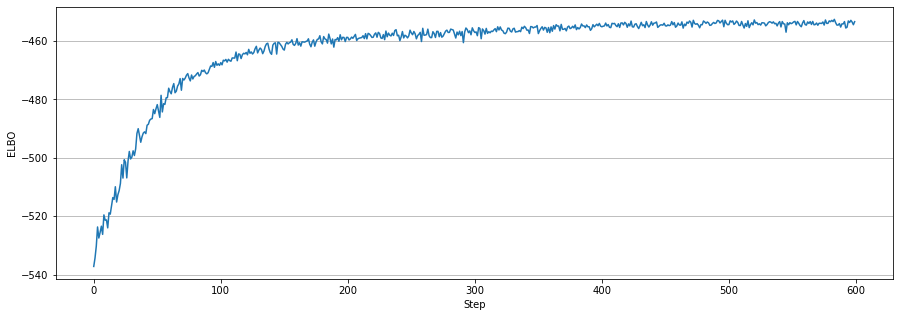

In [7]:
plot_elbos(elbos, "figs/p4_elbos.png")

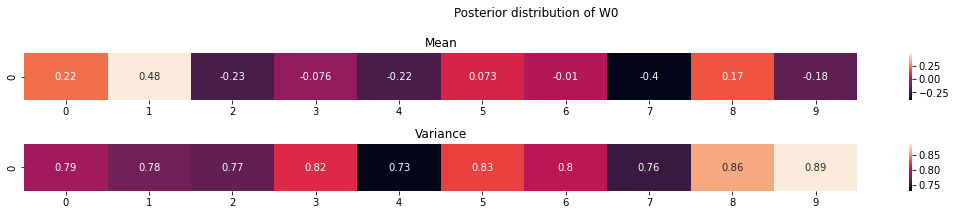

In [25]:
plt.figure(figsize=(15, 3))
plt.subplot(2, 1, 1)
sns.heatmap(np.mean(samples['W0'], axis=0, keepdims=True), annot=True)
plt.title('Mean')
plt.subplot(2, 1, 2)
sns.heatmap(np.var(samples['W0'], axis=0, keepdims=True), annot=True)
plt.title('Variance')
plt.suptitle("Posterior distribution of W0")
plt.tight_layout()
plt.savefig("figs/p4_W0.png")

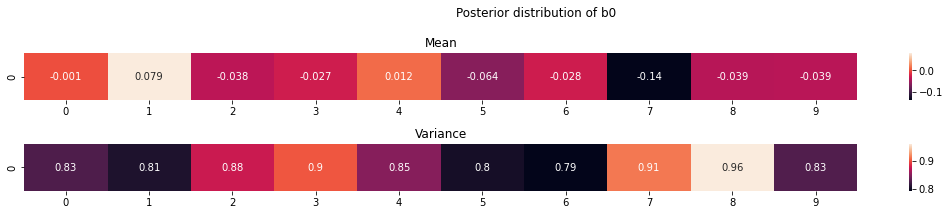

In [26]:
plt.figure(figsize=(15, 3))
plt.subplot(2, 1, 1)
sns.heatmap(np.mean(samples['b0'], axis=0, keepdims=True), annot=True)
plt.title('Mean')
plt.subplot(2, 1, 2)
sns.heatmap(np.var(samples['b0'], axis=0, keepdims=True), annot=True)
plt.title('Variance')
plt.suptitle("Posterior distribution of b0")
plt.tight_layout()
plt.savefig("figs/p4_b0.png")

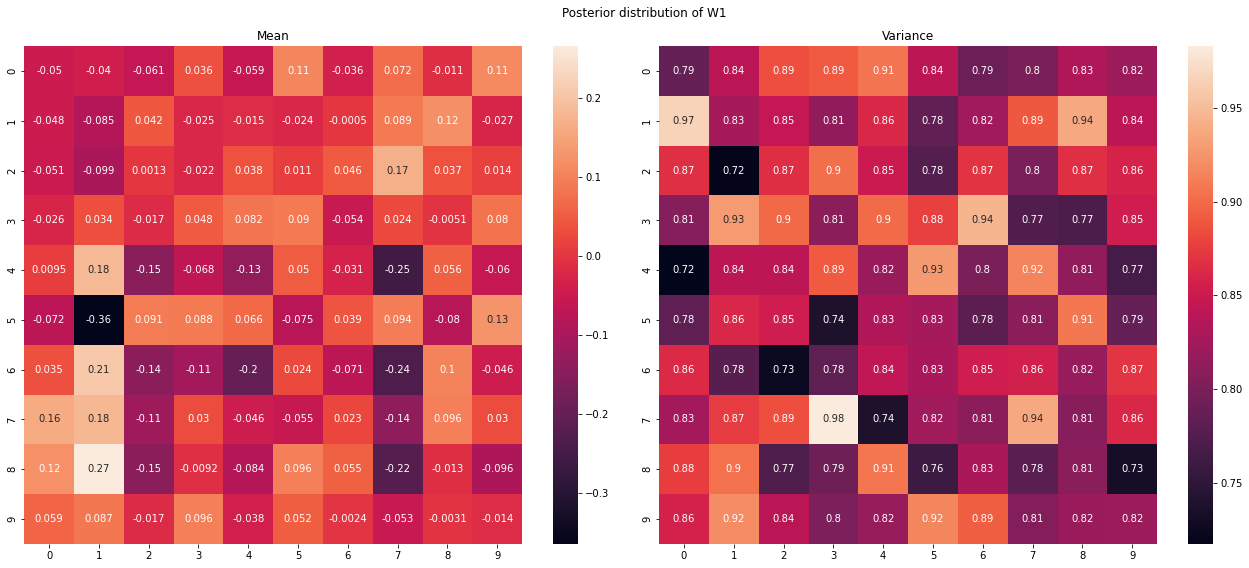

In [31]:
plt.figure(figsize=(18, 8))
plt.subplot(1, 2, 1)
sns.heatmap(np.mean(samples['W1'], axis=0, keepdims=False), annot=True)
plt.title('Mean')
plt.subplot(1, 2, 2)
sns.heatmap(np.var(samples['W1'], axis=0, keepdims=False), annot=True)
plt.title('Variance')
plt.suptitle("Posterior distribution of W1")
plt.tight_layout()
plt.savefig("figs/p4_W1.png")

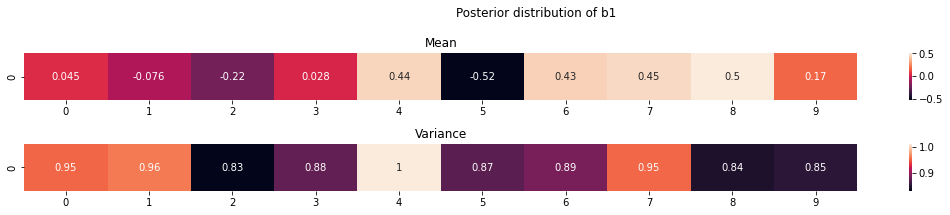

In [32]:
plt.figure(figsize=(15, 3))
plt.subplot(2, 1, 1)
sns.heatmap(np.mean(samples['b1'], axis=0, keepdims=True), annot=True)
plt.title('Mean')
plt.subplot(2, 1, 2)
sns.heatmap(np.var(samples['b1'], axis=0, keepdims=True), annot=True)
plt.title('Variance')
plt.suptitle("Posterior distribution of b1")
plt.tight_layout()
plt.savefig("figs/p4_b1.png")

# Program 5